# Which factors are most associated with banking Crises in Africa ?

# 1.Introduction: 
The purpose of this article is to identify the factors associated with the emergence of banking crises from 1860 to 2014 in a large sample of 13 African countries, using a different models of Machine learning and Deep learning.

# 2.Dataset description:
### Context: 
This dataset is a derivative of Reinhart et. al's Global Financial Stability dataset which can be found online at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx The dataset will be valuable to those who seek to understand the dynamics of financial stability within the African context.
### Content: 
The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe. Acknowledgements Reinhart, C., Rogoff, K., Trebesch, C. and Reinhart, V. (2019) Global Crises Data by Country. [online] https://www.hbs.edu/behavioral-finance-and-financial-stability/data. Available at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx [Accessed: 17 July 2019].
### Input variables:
- systemic_crisis : "0" means that no systemic crisis occurred in the year and "1" means that a systemic crisis occurred in the year;
- exch_usd : The exchange rate of the country vis-a-vis the USD;
- domestic_debt_in_default : "0" means that no sovereign domestic debt default occurred in the year and "1" means that a sovereign domestic debt default occurred in the year;
- sovereign_external_debt_default : "0" means that no sovereign external debt default occurred in the year and "1" means that a sovereign external debt default occurred in the year;
- gdp_weighted_default : The total debt in default vis-a-vis the GDP;
- inflation_annual_cpi : The annual CPI Inflation rate;
- independence : "0" means "no independence" and "1" means "independence";
- currency_crises : "0" means that no currency crisis occurred in the year and "1" means that a currency crisis occurred in the year;
- inflation_crises : "0" means that no inflation crisis occurred in the year and "1" means that an inflation crisis occurred in the year.


### Predict variable (desired target):
- banking_crisis : "no_crisis" means that no banking crisis occurred in the year and "crisis" means that a banking crisis occurred in the year.



In [1]:
# Import needed Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

In [2]:
#Importing dataset
data = pd.read_csv('../input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv')

# 3.Data exploration
This step is crucial. The goal is to get a better understanding of the data. That intuition will be helpful when modeling, imputing missing data and looking at outliers.

One easy way to start is to count the number of rows and columns in your dataset:


In [3]:
 print(data.shape)

(1059, 14)


(1059, 14) as output which means our dataset has 1059 rows and 14 columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 116.0+ KB


In [5]:
# Get column names
data.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

 ### Visualisations
#### Systemic Crisis
A systemic crisis is a domino effect in which a financial trouble spreads. between institutions and markets until it affects the whole monetary. and financial system with dire global economic consequences

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

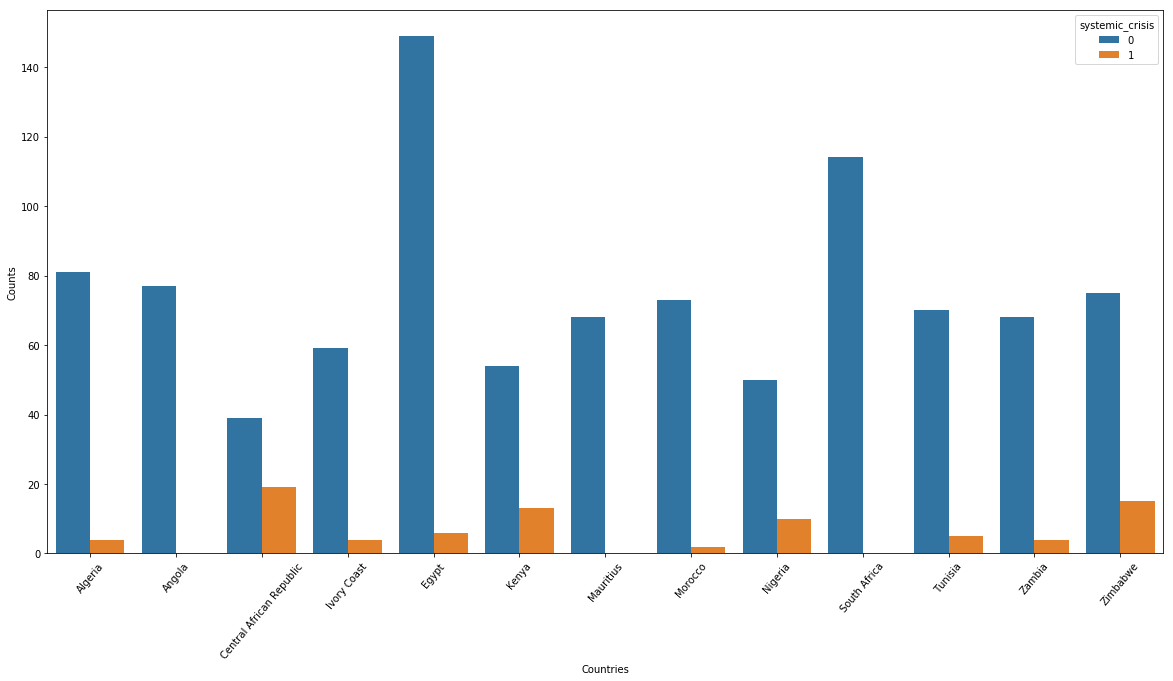

In [6]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(data['country'],hue=data['systemic_crisis'],ax=ax)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=50)

The country that shows the highest count for systemic crisis is Central African Republic followed by Zimbabwe and Kenya. As per the definition of systemic crisis, there should be a link between systemic crisis and banking crisis. Lets check if these countries had a banking crisis at the same time.

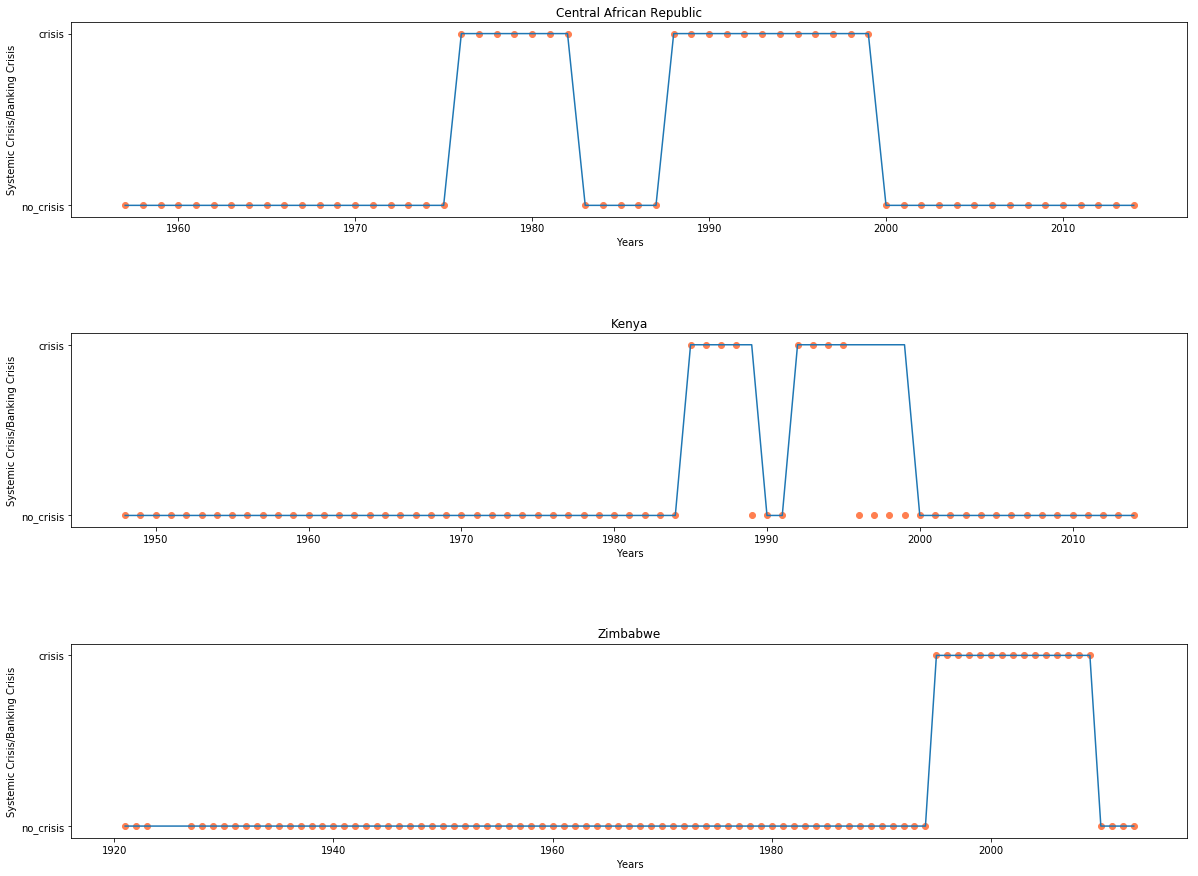

In [7]:
systemic = data[['year','country', 'systemic_crisis', 'banking_crisis']]
systemic = systemic[(systemic['country'] == 'Central African Republic') | (systemic['country']=='Kenya') | (systemic['country']=='Zimbabwe') ]
plt.figure(figsize=(20,15))
count = 1

for country in systemic.country.unique():
    plt.subplot(len(systemic.country.unique()),1,count)
    subset = systemic[(systemic['country'] == country)]
    sns.lineplot(subset['year'],subset['systemic_crisis'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Systemic Crisis/Banking Crisis')
    plt.title(country)
    count+=1

This shows how both the crisis overlap leading to confirming that systemic crisis has an impact on banking crisis.

#### Exchange Rates Over The Years
An exchange rate is the value of one country's currency versus the currency of another country or economic zone.
Let's visualize the exchange rate of the country vis-a-vis the USD


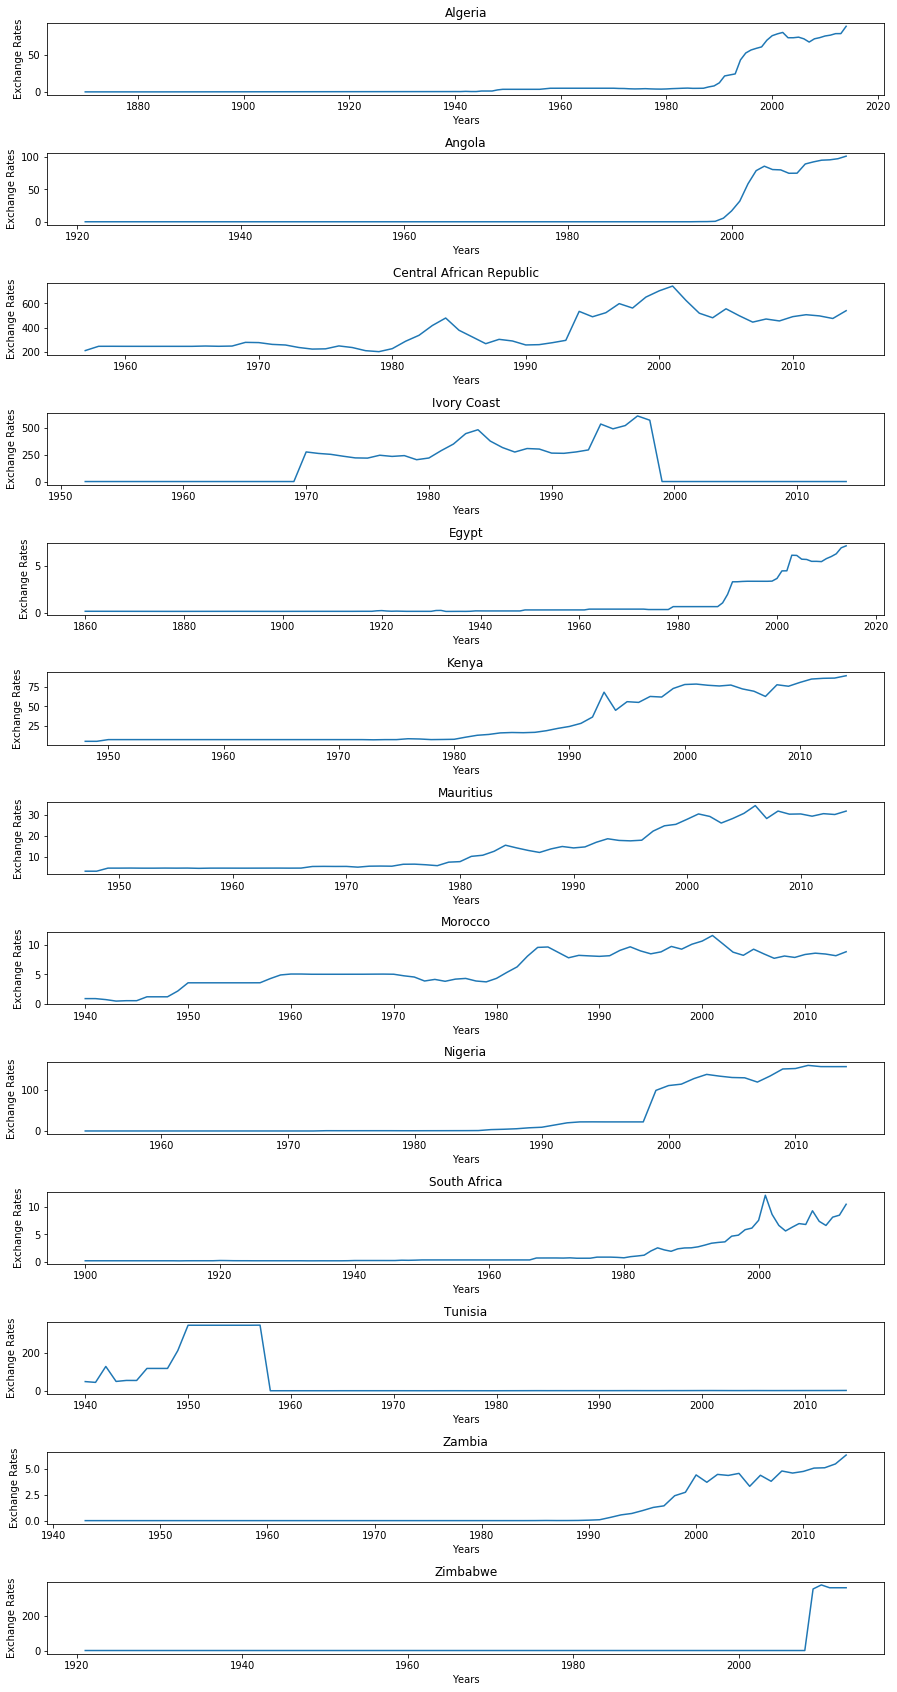

In [8]:
plt.figure(figsize=(15,30))
count = 1
for country in data.country.unique():
    plt.subplot(len(data.country.unique()),1,count)
    count+=1
    sns.lineplot(data[data.country==country]['year'],data[data.country==country]['exch_usd'])
    plt.subplots_adjust(hspace=0.8)
    plt.xlabel('Years')
    plt.ylabel('Exchange Rates')
    plt.title(country)

#### Sovereign Domestic Debt Default
Sovereign debt is a central government's debt. It is debt issued by the national government in a foreign currency in order to finance the issuing country's growth and development. The stability of the issuing government can be provided by the country's sovereign credit ratings which help investors weigh risks when assessing sovereign debt investments.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

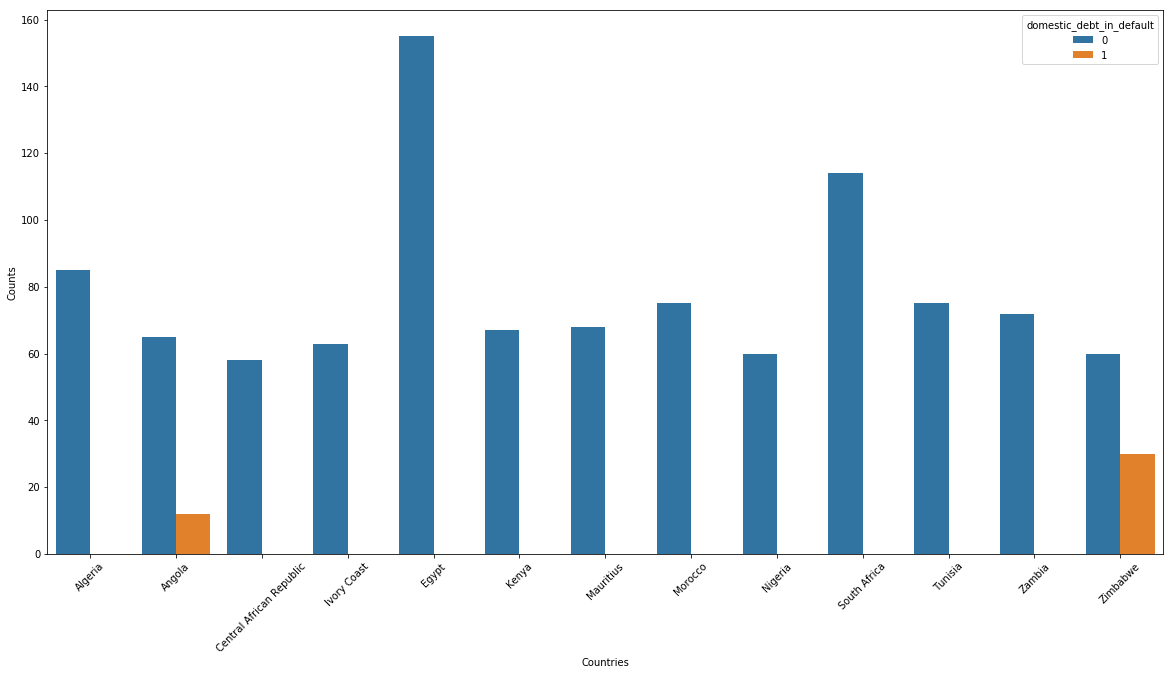

In [9]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(data['country'],hue=data['domestic_debt_in_default'],ax=ax)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

We see only Angola and Zimbabwe defaulting. Let's take a look at a few other things for these two countries in particular

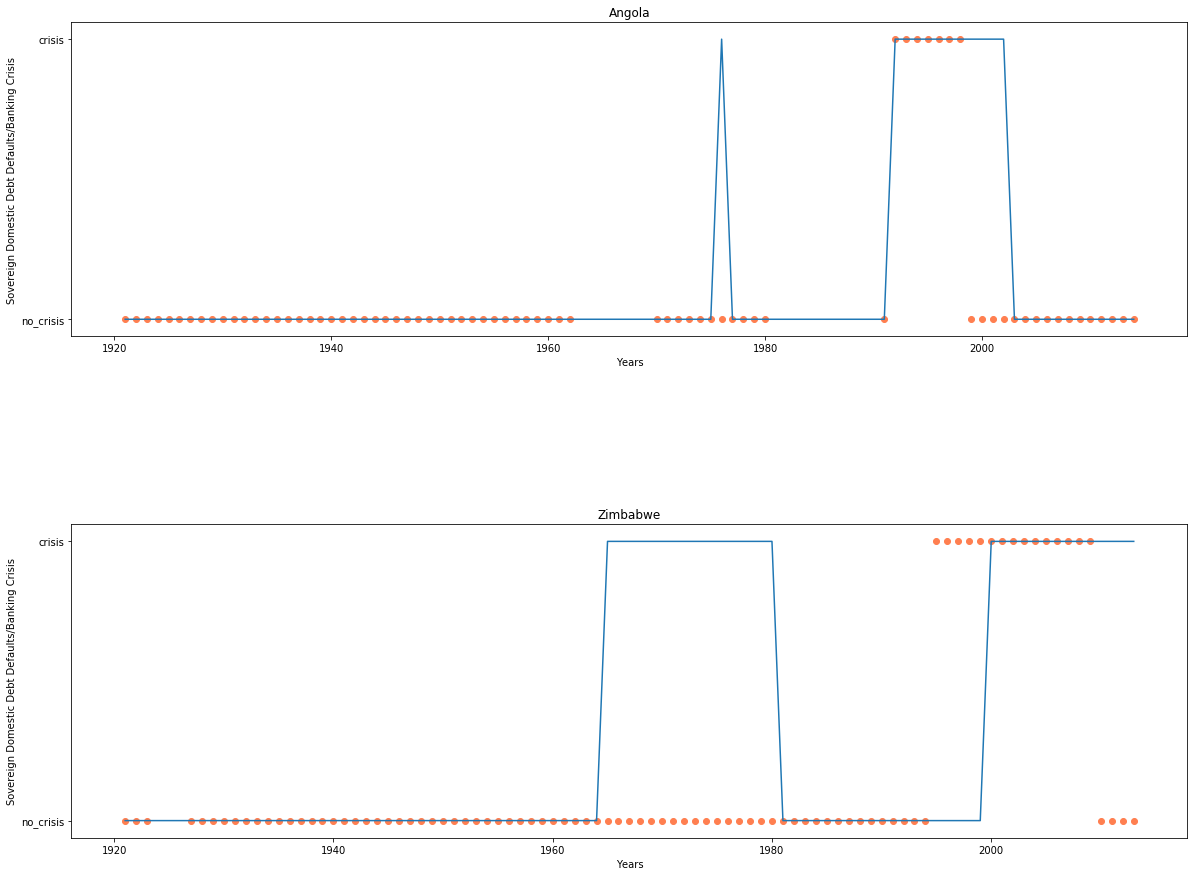

In [10]:
sovereign = data[['year','country', 'domestic_debt_in_default', 'banking_crisis']]
sovereign = sovereign[(sovereign['country'] == 'Angola') | (sovereign['country']=='Zimbabwe') ]
plt.figure(figsize=(20,15))
count = 1

for country in sovereign.country.unique():
    plt.subplot(len(sovereign.country.unique()),1,count)
    subset = sovereign[(sovereign['country'] == country)]
    sns.lineplot(subset['year'],subset['domestic_debt_in_default'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Sovereign Domestic Debt Defaults/Banking Crisis')
    plt.title(country)
    count+=1

This shows that during the times these two coutries faced a banking crisis, they also defaulted on the sovereign debts. For example, for Angola, somewhere around late 1970's despite not having a banking crisis, the country defaulted for domestic default but quickly came back from it. After that, it was only around the begining of 1990, we see that a banking crisis, eventually lead the country to default again. Similarly, for Zimbabwe the country was already facing a banking crisis which eventually led it to default on domestic debts.

#### Sovereign External Debt Default
External debt is the portion of a country's debt that was borrowed from foreign lenders, including commercial banks, governments, or international financial institutions. These loans, including interest, must usually be paid in the currency in which the loan was made. To earn the needed currency, the borrowing country may sell and export goods to the lender's country.

A debt crisis can occur if a country with a weak economy is not able to repay the external debt due to the inability to produce and sell goods and make a profitable return.

If a nation is unable or refuses to repay its external debt, it is said to be in a sovereign default. This can lead to the lenders withholding future releases of assets that might be needed by the borrowing nation. Such instances can have a rolling effect, wherein the borrower’s currency collapses and that nation’s overall economic growth is stalled.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

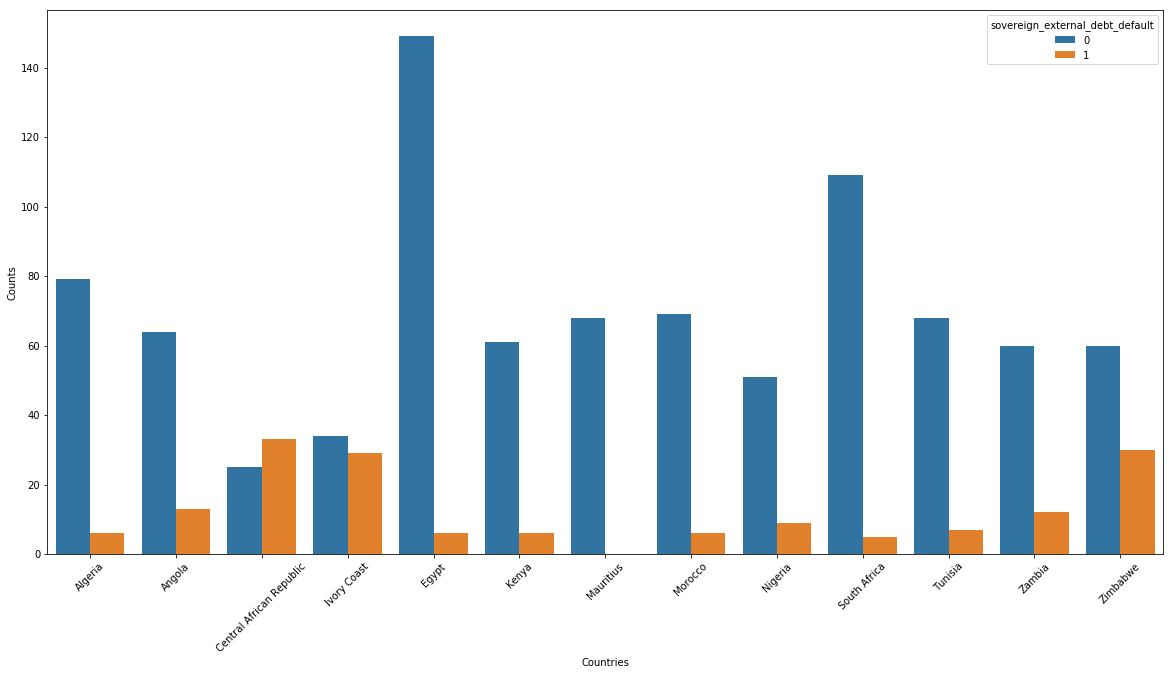

In [11]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(data['country'],hue=data['sovereign_external_debt_default'],ax=ax)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

We see only Central African Republic , Ivory Coast and Zimbabwe defaulting. Let's take a look at a few other things for these three countries in particular

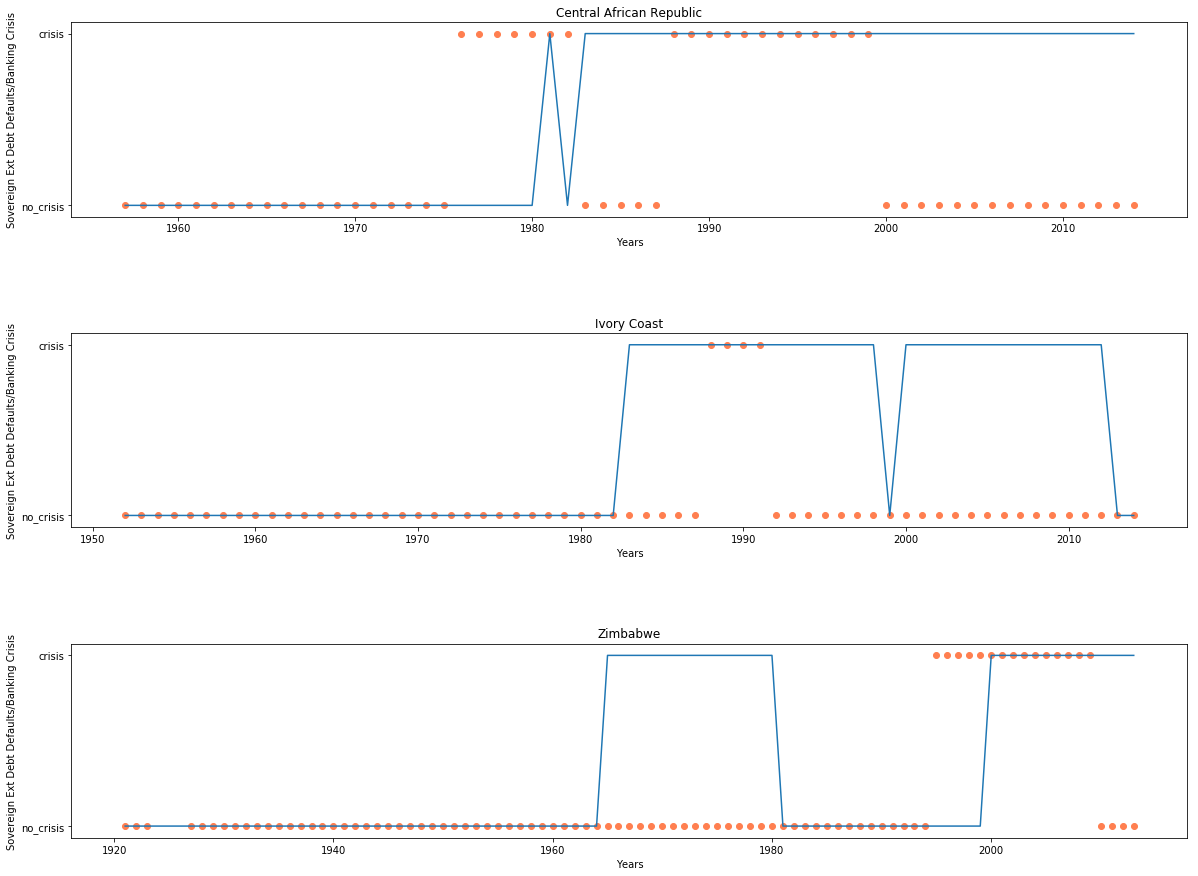

In [12]:
sovereign_ext = data[['year','country', 'sovereign_external_debt_default', 'banking_crisis']]
sovereign_ext = sovereign_ext[(sovereign_ext['country'] == 'Central African Republic') | (sovereign_ext['country'] == 'Ivory Coast') | (sovereign_ext['country']=='Zimbabwe') ]
plt.figure(figsize=(20,15))
count = 1

for country in sovereign_ext.country.unique():
    plt.subplot(len(sovereign_ext.country.unique()),1,count)
    subset = sovereign_ext[(sovereign_ext['country'] == country)]
    sns.lineplot(subset['year'],subset['sovereign_external_debt_default'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Sovereign Ext Debt Defaults/Banking Crisis')
    plt.title(country)
    count+=1

This shows that the three countries default on external debt, despite not having a banking crisis as a premise. Even without the banking crisis they are marked to default on external debt.

#### Currency Crisis
A currency crisis is a situation in which serious doubt exists as to whether a country's central bank has sufficient foreign exchange reserves to maintain the country's fixed exchange rate. The crisis is often accompanied by a speculative attack in the foreign exchange market. A currency crisis results from chronic balance of payments deficits, and thus is also called a balance of payments crisis. Often such a crisis culminates in a devaluation of the currency.
Let's take a look at the countries who were reported to have faced a currency crisis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

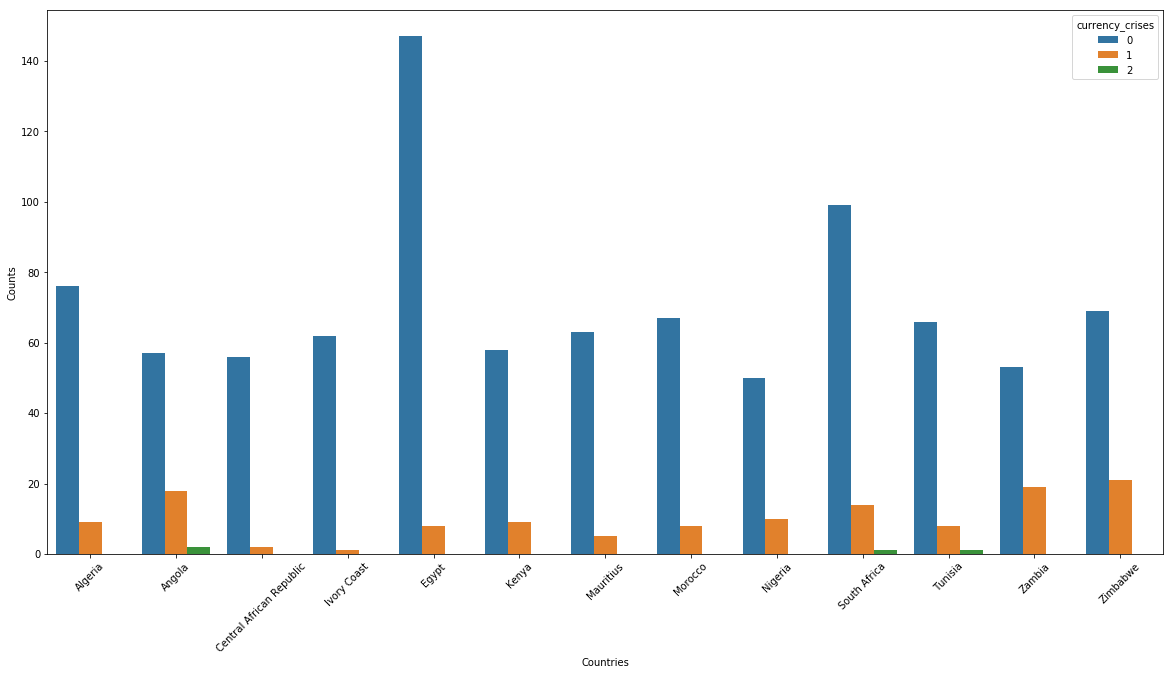

In [13]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(data['country'],hue=data['currency_crises'],ax=ax)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

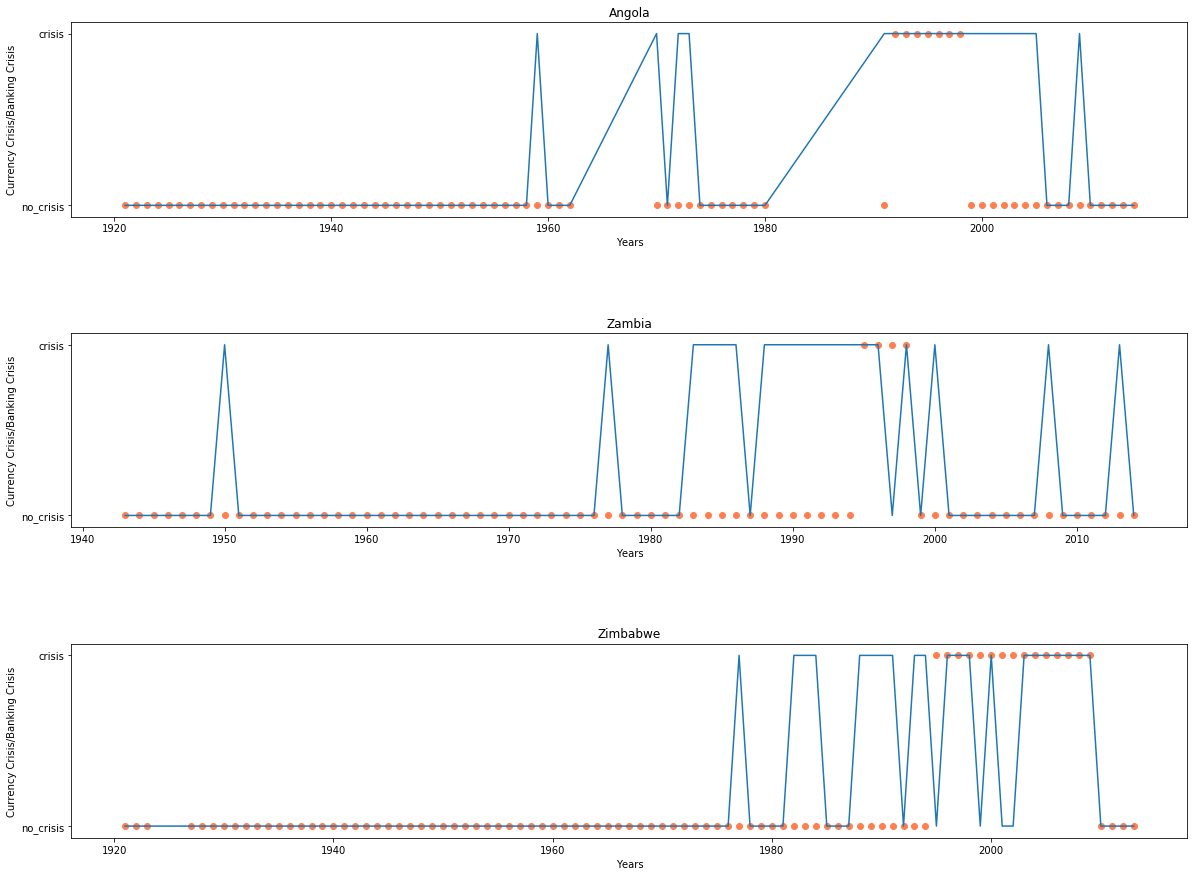

In [14]:
curr = data[['year','country', 'currency_crises', 'banking_crisis']]
curr = curr[(curr['country'] == 'Angola') | (curr['country'] == 'Zambia') | (curr['country']=='Zimbabwe') ]
curr = curr.replace(to_replace=2, value=1, regex=False)

plt.figure(figsize=(20,15))
count = 1

for country in curr.country.unique():
    plt.subplot(len(curr.country.unique()),1,count)
    subset = curr[(curr['country'] == country)]
    sns.lineplot(subset['year'],subset['currency_crises'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Currency Crisis/Banking Crisis')
    plt.title(country)
    count+=1

What we see is that these countries faced fluctuating currency crisis even before they were hit with a banking crisis. For example look at Zimbabwe's currency crisis spread. This country faced a currency crisis on and off for around 10 years in total before it faced a banking crisis.

#### Inflation Crisis
Inflation is a quantitative measure of the rate at which the average price level of a basket of selected goods and services in an economy increases over a period of time. It is the constant rise in the general level of prices where a unit of currency buys less than it did in prior periods.

Let's look at the countries that were accounted for an inflation crisis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

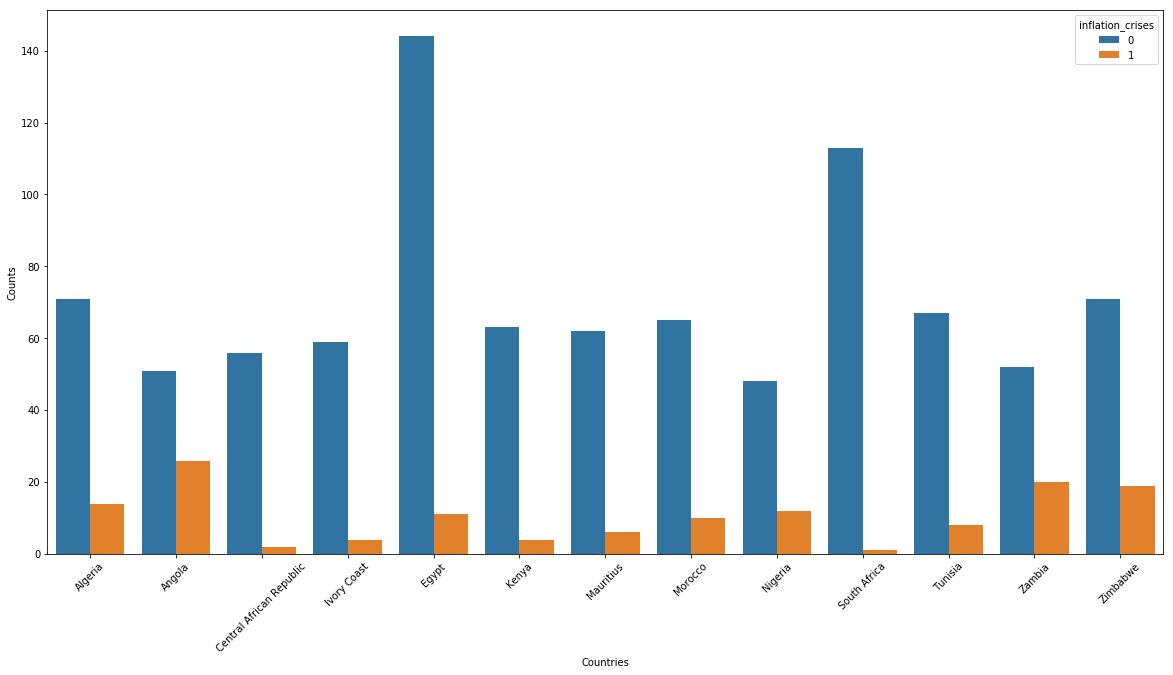

In [15]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(data['country'],hue=data['inflation_crises'],ax=ax)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

Most commonly used inflation indexes are the Consumer Price Index (CPI). Let's look at the Annual CPI for the three countries to see if we can derive any insights.

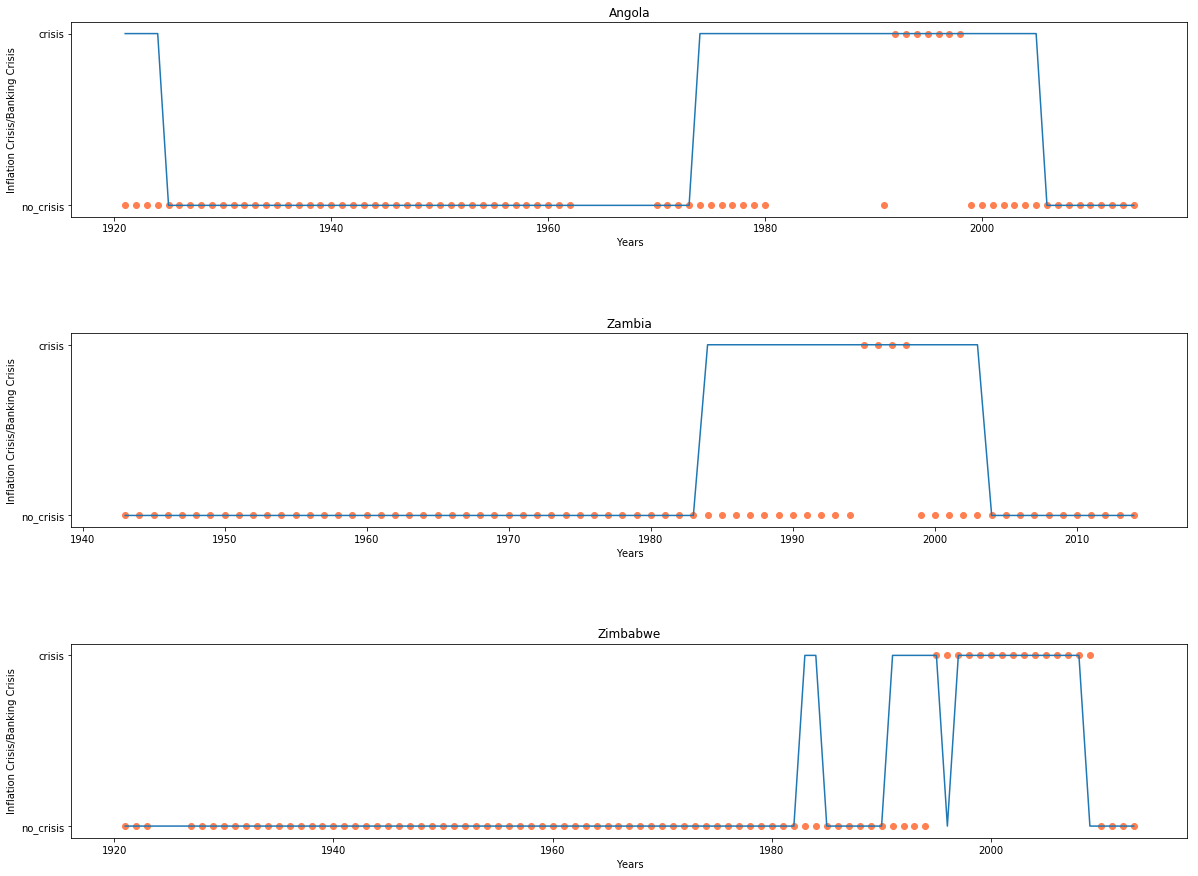

In [16]:
infla = data[['year','country', 'inflation_crises', 'inflation_annual_cpi', 'banking_crisis']]
infla = infla[(infla['country'] == 'Angola') | (infla['country'] == 'Zambia') | (infla['country']=='Zimbabwe') ]
infla = infla.replace(to_replace=2, value=1, regex=False)

plt.figure(figsize=(20,15))
count = 1

for country in infla.country.unique():
    plt.subplot(len(infla.country.unique()),1,count)
    subset = infla[(infla['country'] == country)]
    sns.lineplot(subset['year'],subset['inflation_crises'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Inflation Crisis/Banking Crisis')
    plt.title(country)
    count+=1

Again, like currency crisis, we see that the countries had an inflation crisis, despite not being hit by a banking crisis. Inflation can be viewed positively or negatively depending on the individual viewpoint. Those with tangible assets, like property or stocked commodities, may like to see some inflation as that raises the value of their assets. People holding cash may not like inflation, as it erodes the value of their cash holdings. Ideally, an optimum level of inflation is required to promote spending to a certain extent instead of saving, thereby nurturing economic growth.

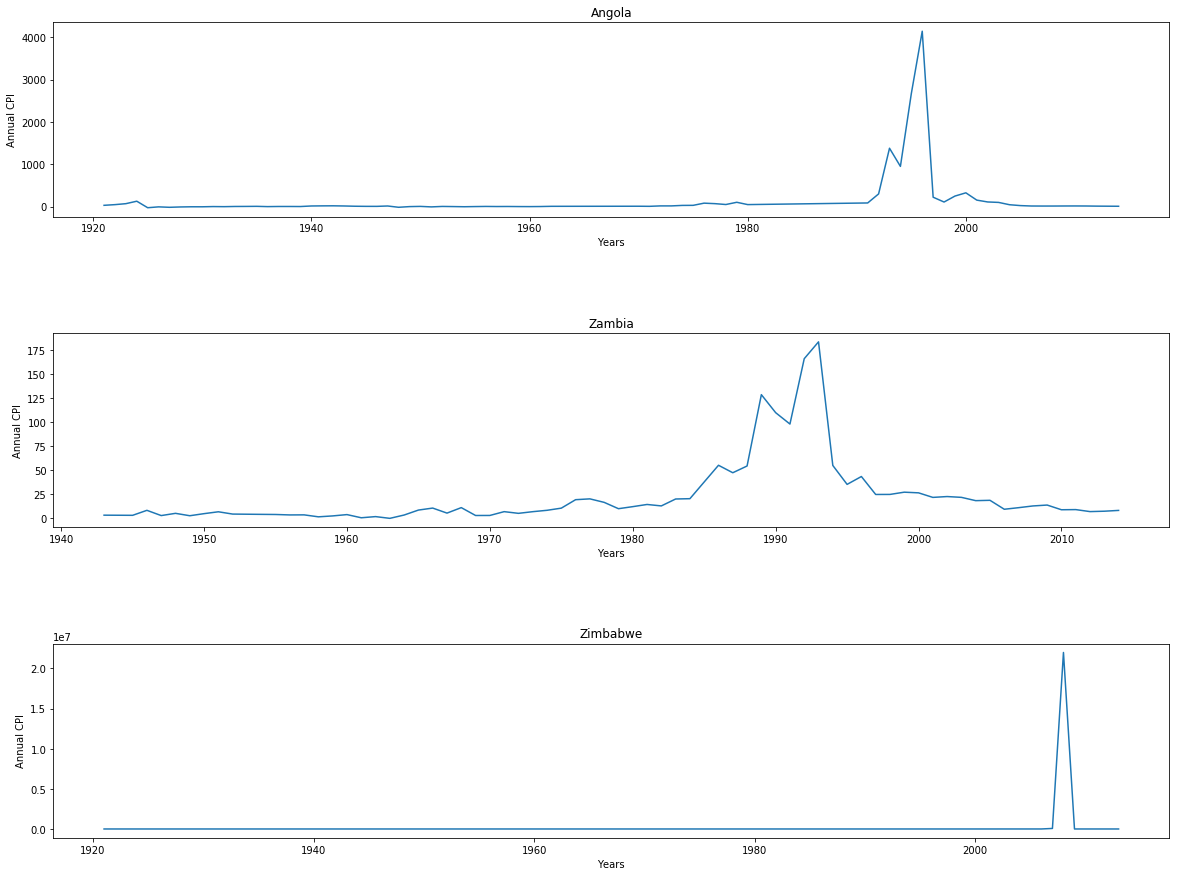

In [17]:
plt.figure(figsize=(20,15))
count = 1

for country in infla.country.unique():
    plt.subplot(len(infla.country.unique()),1,count)
    subset = infla[(infla['country'] == country)]
    sns.lineplot(subset[subset.country==country]['year'], subset[subset.country==country]['inflation_annual_cpi'])
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Annual CPI')
    plt.title(country)
    count+=1

The rise in the annual CPI for the countries co-incide around the same time period when the country was facing a banking crisis.

# 4.Models building
The goal of this part is to build an explanatory model that identifies which factors are most associated with banking crisis in Africa and also to come up with a model for predictions.

We are going to use different models such as: 
-	Logistic regression 
-	Simple Neural network 

Our next step is to divide the data into “attributes” and “labels”. X variable contains all the attributes/features and Y variable contains labels.



# 4.1 Logistic Regression model

In [18]:
# Divide the data into “attributes”  X and “labels”  Y 
X = data[['systemic_crisis', 'exch_usd', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'gdp_weighted_default',
       'inflation_annual_cpi', 'independence', 'currency_crises',
       'inflation_crises']]
# Define the Y variable 
Y = data['banking_crisis']

## percentage of  crisis & no crisis

count_no_crisis = len(data[Y=='no_crisis'])
count_crisis = len(data[Y=='crisis'])
pct_of_no_crisis = count_no_crisis/(count_no_crisis+count_crisis)
print("percentage of no crisis is", pct_of_no_crisis*100)
pct_of_crisis = count_crisis/(count_no_crisis+count_crisis)
print("percentage of crisis", pct_of_crisis*100)

percentage of no crisis is 91.123701605288
percentage of crisis 8.876298394711993


Our classes are imbalanced, and the ratio of no crisis is 91%.

#### Over-sampling using SMOTE
With our training data created, we’ll up-sample the crisis using the SMOTE algorithm(Synthetic Minority Oversampling Technique). 

SMOTE: Works by creating synthetic samples from the minor class (crisis) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

We are going to implement SMOTE in Python :

In [19]:
# convert Y 
Y= pd.get_dummies(Y)
Y = Y.drop(['no_crisis'], axis = 1)

# Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_Y=os.fit_sample(X_train, Y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_Y= pd.DataFrame(data=os_data_Y,columns=['Y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of crisis in oversampled data",len(os_data_Y[os_data_Y['Y']==1]))
print("Number of no crisis",len(os_data_Y[os_data_Y['Y']==0]))
print("Proportion of no crisis data in oversampled data is ",len(os_data_Y[os_data_Y['Y']==0])/len(os_data_X))
print("Proportion of crisis data in oversampled data is ",len(os_data_Y[os_data_Y['Y']==1])/len(os_data_X))

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

length of oversampled data is  1360
Number of crisis in oversampled data 680
Number of no crisis 680
Proportion of no crisis data in oversampled data is  0.5
Proportion of crisis data in oversampled data is  0.5


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Proportion of no crisis data in oversampled data is  0.5

- Proportion of crisis data in oversampled data is  0.5

Now we have a perfect balanced data ! 

We may have noticed that we over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

### Implementing the model

Let’s first use the stasmodel.api method to run the logistic regression model as shown in the following code:

In [20]:
X=os_data_X
Y=os_data_Y
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 12
                                 Results: Logit
Model:                     Logit                  Pseudo R-squared:       inf   
Dependent Variable:        Y                      AIC:                    inf   
Date:                      2020-04-17 06:06       BIC:                    inf   
No. Observations:          1360                   Log-Likelihood:         -inf  
Df Model:                  8                      LL-Null:                0.0000
Df Residuals:              1351                   LLR p-value:            1.0000
Converged:                 1.0000                 Scale:                  1.0000
No. Iterations:            12.0000                                              
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------

/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


One advantage of this method is that p-values are calculated automatically in the result summary. 

The scikit-learn method doesn’t have this facility, but is more powerful for calculation-intensive tasks such as prediction, calculating scores, and advanced functions such as feature selection. 

The statsmodel.api method can be used while exploring and fine-tuning the model, while the scikit-learn method can be used in the final model used to predict the outcome.

The p-values for most of the variables are smaller than 0.05, except some variables, therefore, we will remove them.

In [21]:
cols=['systemic_crisis', 'exch_usd','gdp_weighted_default','independence'] 
X=os_data_X[cols]
y=os_data_Y['Y']
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: inf
         Iterations 11
                           Results: Logit
Model:                  Logit              Pseudo R-squared:   inf   
Dependent Variable:     Y                  AIC:                inf   
Date:                   2020-04-17 06:06   BIC:                inf   
No. Observations:       1360               Log-Likelihood:     -inf  
Df Model:               3                  LL-Null:            0.0000
Df Residuals:           1356               LLR p-value:        1.0000
Converged:              1.0000             Scale:              1.0000
No. Iterations:         11.0000                                      
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
systemic_crisis      17.1687   1.9504   8.8029 0.0000 13.3461 20.9913
exch_usd            

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


We will be using the scikit-learn method to fit the model as is shown in the following
code snippet:

In [22]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf.fit(X, Y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy of this model can be calculated as follows:

In [23]:
clf.score(X,Y)

0.9367647058823529

Accuracy of logistic regression classifier on test set: 0.93

For this method, one can get the value of the coefficients using the following code snippet:

In [24]:
pd.DataFrame(zip(X.columns, np.transpose(clf.coef_)))

,0,1
0,systemic_crisis,[8.013062387097765]
1,exch_usd,[-0.00588172201344592]
2,gdp_weighted_default,[1.3559775722361]
3,independence,[1.7282525484728413]


The variable coefficients indicate the change in the log (odds) for a unit change in the variable. The coefficient for the** systemic_crisis** variable is 8.01. This implies that, if the ** systemic_crisis** variable increases by 1, the log(odds) will increase by  6.46 and, hence, the probability of the **emergence of banking crises**  will change accordingly.

### Model validation and evaluation
The preceding logistic regression model is built on the entire data. Let us now split the data into training and testing sets, build the model using the training set, and then check the accuracy using the testing set. The ultimate goal is to see whether it improves the accuracy of the prediction or not:

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.95


Accuracy of logistic regression classifier on test set: 0.95

### Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[205   0]
 [ 21 182]]


The result is telling us that we have 205+182 correct predictions and 21+0 incorrect predictions.

### ROC Curve

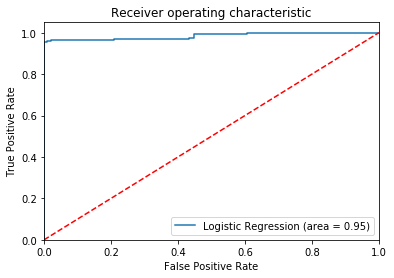

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Conclusion :
Our result indicate that banking crises in Africa is significantly correleted with four macroeconimcs factors : 
- systemic_crisis
- gdp_weighted_default
- exch_usd
- independence

# 4.2 Simple neural network model
In this part we will design a simple neural network to predict whether or not a banking crisis will occur in a given country in a given year.

In [29]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

df = pd.read_csv('../input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv')

In [30]:
# converting into useful numbers

df['banking_crisis'] = df['banking_crisis'].replace('crisis',np.nan)
df['banking_crisis'] = df['banking_crisis'].fillna(1)
df['banking_crisis'] = df['banking_crisis'].replace('no_crisis',np.nan)
df['banking_crisis'] = df['banking_crisis'].fillna(0)

# removing unneccesary data

df.drop(['cc3','country'], axis=1, inplace=True)

# scaling the data

df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['banking_crisis'] = df['banking_crisis']
df = df_scaled

# defining the input data, X, and the desired results, y 

X = df.loc[:,df.columns != 'banking_crisis']
y = df.loc[:, 'banking_crisis']

# breaking data into training data, validation data, and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2)

In [31]:
# number of inputs
print(X.shape)

(1059, 11)


### Network architecture
Our model will have a single fully connected hidden layer with the same number of neurons as input variables. This is a good default starting point when creating neural networks.

The weights are initialized using a small Gaussian random number. The Rectifier activation function (ReLu) is used. The output layer contains a single neuron in order to make predictions. It uses the sigmoid activation function in order to produce a probability output in the range of 0 to 1 that can easily and automatically be converted to crisp class values.

Finally, we are using the logarithmic loss function (binary_crossentropy) during training, the preferred loss function for binary classification problems. The model also uses the efficient Adam optimization algorithm for gradient descent and accuracy metrics will be collected when the model is trained

In [32]:
# create model
model = Sequential()
model.add(Dense(11, input_dim=11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# training the network

model.fit(X_train, y_train, epochs=200)

# scoring it on the data it trained on as well as test data

scores = model.evaluate(X_train, y_train)
print ("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print ("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Epoch 1/200
677/677 [==============================] - 0s 724us/step - loss: 0.6655 - acc: 0.6736
Epoch 2/200
677/677 [==============================] - 0s 47us/step - loss: 0.5819 - acc: 0.7829
Epoch 3/200
677/677 [==============================] - 0s 47us/step - loss: 0.5113 - acc: 0.8493
Epoch 4/200
677/677 [==============================] - 0s 48us/step - loss: 0.4529 - acc: 0.8744
Epoch 5/200
677/677 [==============================] - 0s 46us/step - loss: 0.4034 - acc: 0.8848
Epoch 6/200
677/677 [==============================] - 0s 46us/step - loss: 0.3618 - acc: 0.8892
Epoch 7/200
677/677 [==============================] - 0s 45us/step - loss: 0.3276 - acc: 0.8922
Epoch 8/200
677/677 [==============================] - 0s 47us/step - loss: 0.2989 - acc: 0.9158
Epoch 9/200
677/677 [==============================] - 0s 47us/step - loss: 0.2751 - acc: 0.9217
Epoch 10/200
677/677 [==============================] - 0s 45us/step - loss: 0.2542 - acc: 0.9291
Epoch 11/200
677/677 [======

The classifier showed good performance while predicting the positive cases in both training and testing set.

In this first architecture, we take our model with 11 neurons in the hidden layer and we will try to reduce it by half to 5. This will put pressure on the network during training to pick out the most important structure in the input data to model.
One aspect that may have an outsized effect is the structure of the network itself called the network topology.
A neural network topology with more layers offers more opportunity for the network to extract key features and recombine them in useful nonlinear ways.
We will add one new layer (one line) to the network that introduces another hidden layer with 5 neurons after the first hidden layer.
Our network now has the topology:

**11 inputs --> (5 --> 5)-- 1 output**


In [33]:
# create model
model = Sequential()
model.add(Dense(5, input_dim=11, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# training the network

model.fit(X_train, y_train, epochs=200)

# scoring it on the data it trained on as well as test data

scores = model.evaluate(X_train, y_train)
print ("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print ("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Epoch 1/200
677/677 [==============================] - 0s 608us/step - loss: 0.7016 - acc: 0.7814
Epoch 2/200
677/677 [==============================] - 0s 52us/step - loss: 0.6525 - acc: 0.8892
Epoch 3/200
677/677 [==============================] - 0s 51us/step - loss: 0.6093 - acc: 0.9040
Epoch 4/200
677/677 [==============================] - 0s 54us/step - loss: 0.5713 - acc: 0.9084
Epoch 5/200
677/677 [==============================] - 0s 48us/step - loss: 0.5380 - acc: 0.9143
Epoch 6/200
677/677 [==============================] - 0s 51us/step - loss: 0.5051 - acc: 0.9158
Epoch 7/200
677/677 [==============================] - 0s 47us/step - loss: 0.4733 - acc: 0.9158
Epoch 8/200
677/677 [==============================] - 0s 53us/step - loss: 0.4438 - acc: 0.9143
Epoch 9/200
677/677 [==============================] - 0s 52us/step - loss: 0.4137 - acc: 0.9158
Epoch 10/200
677/677 [==============================] - 0s 55us/step - loss: 0.3859 - acc: 0.9232
Epoch 11/200
677/677 [======

Text(32.99999999999999, 0.5, 'Actual')

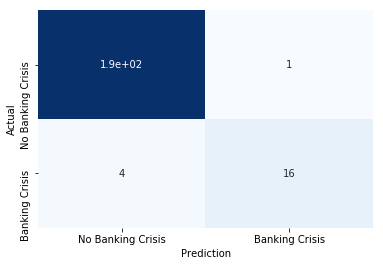

In [34]:
# plotting the confusion matrix

y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test,y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Banking Crisis','Banking Crisis'], yticklabels=['No Banking Crisis','Banking Crisis'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

# 5.Conclusion

* The logistic regression model we have built has enabled us to identify Which factors are most associated with the banking crisis in Africa.
* The neural network classifier we built has a higher performance accuracy boost.
* We also find that a different architecture or a completely different class of algorithms could be used to gain a performance.


# 6.Sources : 
* https://www.investopedia.com/
* https://www.researchgate.net/publication/5221931_The_Determinants_of_Banking_Crises_in_Developing_and_Developed_Countris
